In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import necessary machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("D:\\ML\\Kaggle\\Obesity\\train.csv")
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


Plotting the graphs for visualizatiom

In [7]:
#Previewing the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
#Segregating numerical and categorical data
numerical_cols = data.select_dtypes(['int64','float64']).columns
categorical_cols = data.select_dtypes(['object']).columns
print(numerical_cols)
print(categorical_cols)

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


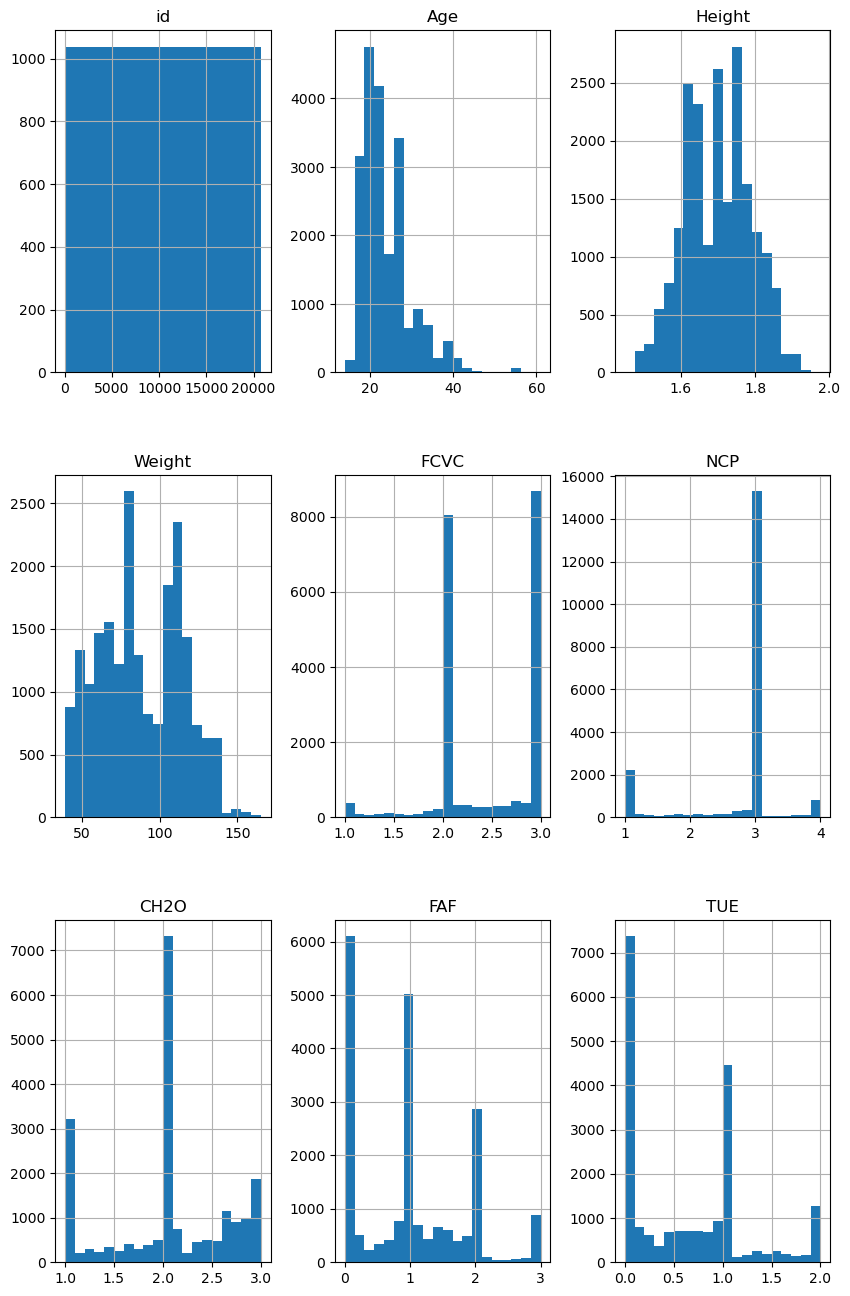

In [42]:
#plotting histogram for numerical plot
%matplotlib inline
data[numerical_cols].hist(figsize=(10,16),bins=20)
plt.show()    

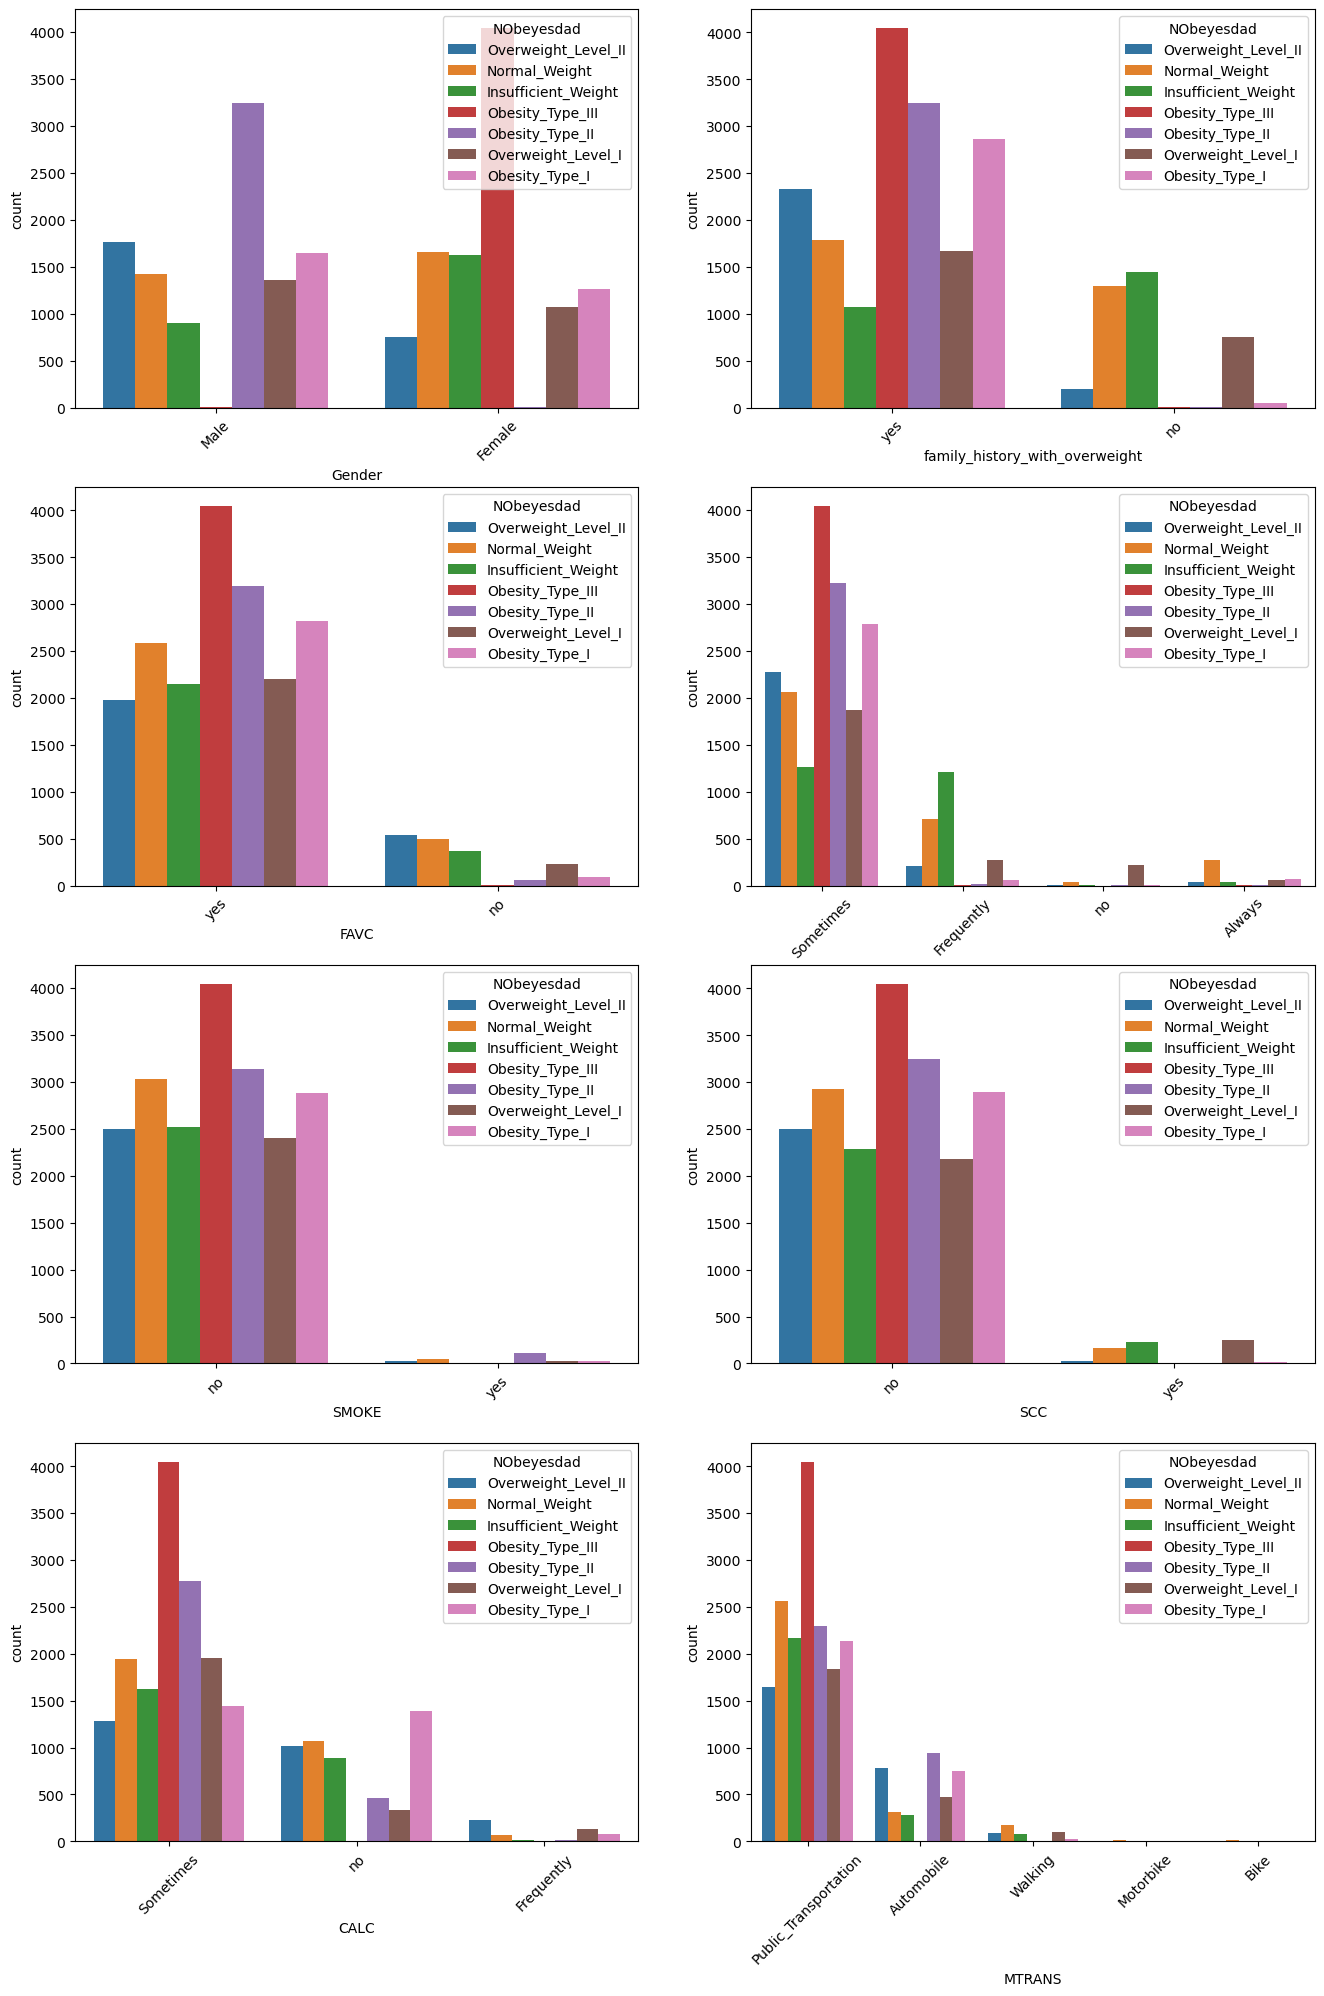

In [18]:
#plotting countplot with categorical columns
num_rows = (len(categorical_cols) + 1) // 2
num_cols = 2

# Set the figure size
plt.figure(figsize=(16, 6 * num_rows))

# Loop through the categorical columns
for i, col in enumerate(categorical_cols, 1):
    if col == 'NObeyesdad':
        continue
    
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=data, x=col, hue='NObeyesdad')
    plt.xticks(rotation=45)

# Display all plots together
plt.show()

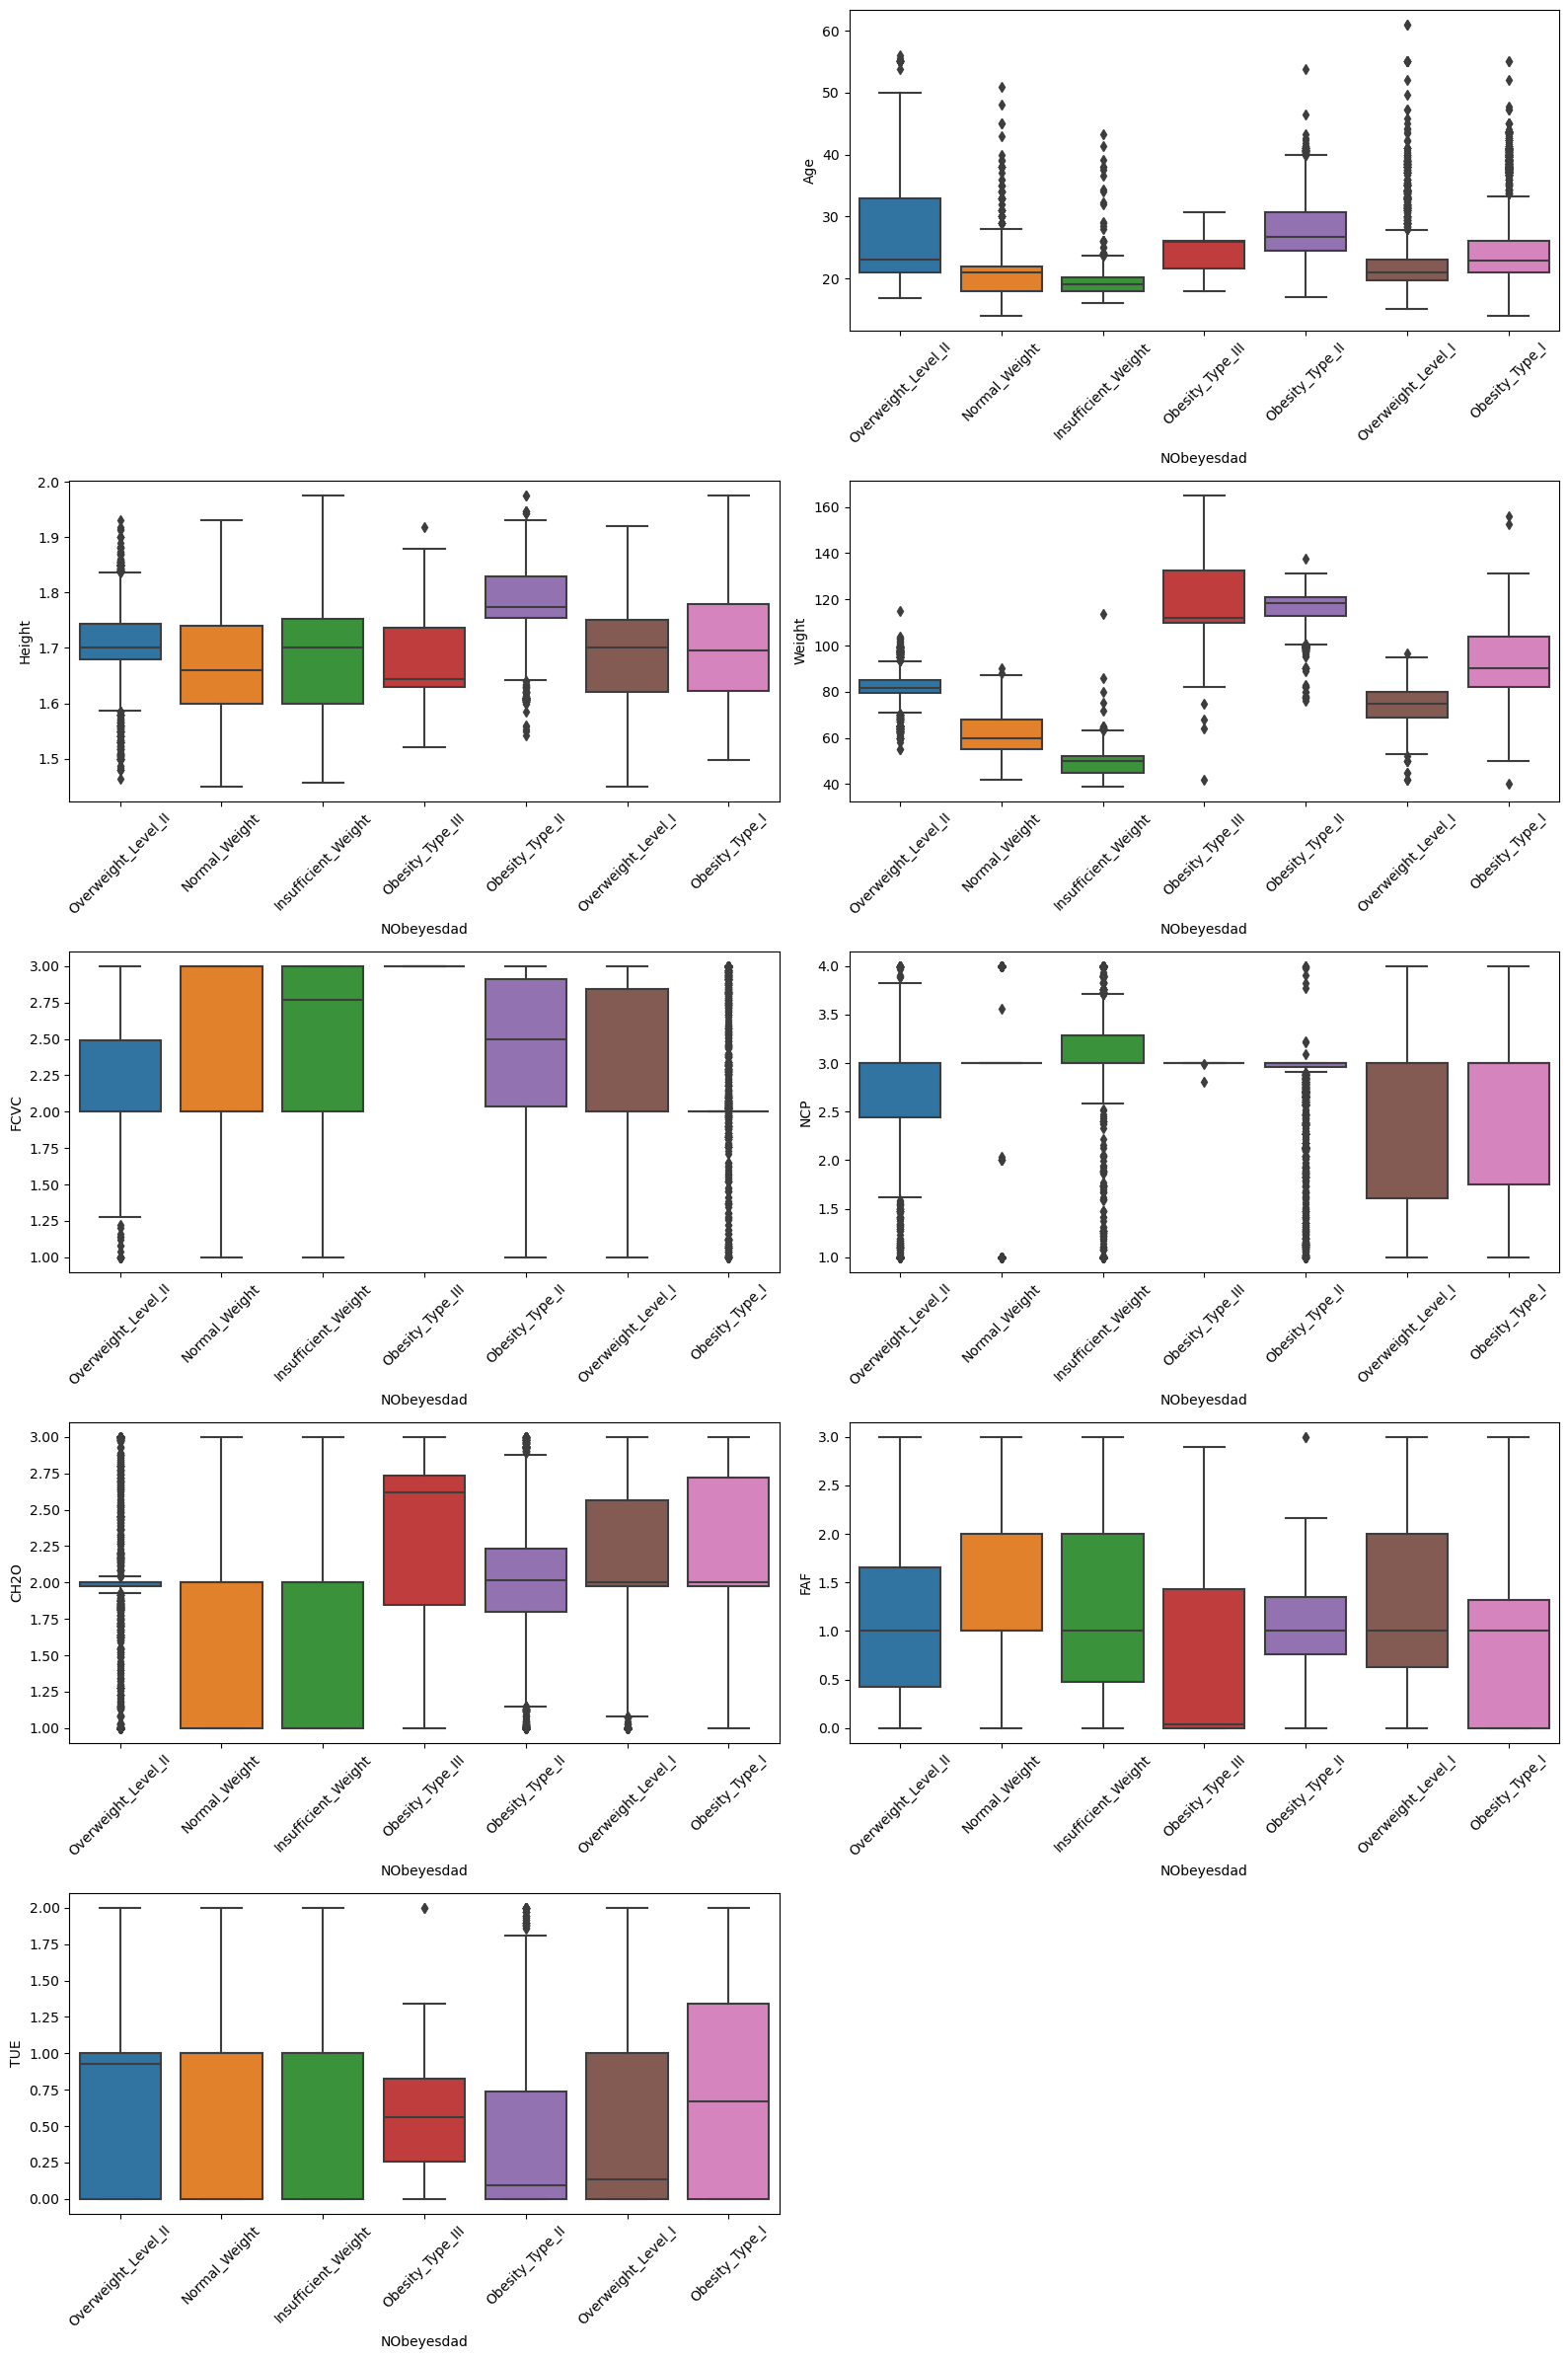

In [17]:
#boxplot of numerical features against the Target 'NObeyesdad
num_rows = len(numerical_cols) + 1 // 2
num_cols = min(2,len(numerical_cols))
plt.figure(figsize=(16,24))
for i,cols in enumerate(numerical_cols,1):
    if cols == 'id':
        continue
    plt.subplot(5,2,i)
    sns.boxplot(data=data,x='NObeyesdad',y=cols)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [33]:
#Create a copy of the dataset to be used for testing
abt_data = data.copy()
test = pd.read_csv("D:\\ML\\Kaggle\\Obesity\\test.csv")
abt_test = test.copy()

In [34]:
X = abt_data.drop(['id','NObeyesdad'],axis=1)
y = abt_data['NObeyesdad']
abt_test = abt_test.drop('id',axis=1)

In [35]:
categorical_cols = categorical_cols.to_list()
categorical_cols.remove('NObeyesdad')

AttributeError: 'list' object has no attribute 'to_list'

In [36]:
#encoding the categorical values
from sklearn.preprocessing import LabelEncoder
for cols in categorical_cols:
    #Fit the combined data to handle unseen data in test and train
    combined_data = pd.concat([X[cols],abt_test[cols]])
    le = LabelEncoder()
    le.fit(combined_data)
    #Transform the training and testing data
    X[cols] = le.transform(X[cols])
    abt_test[cols] = le.transform(abt_test[cols])
    print(f"Classes for {cols}: {le.classes_}")



Classes for Gender: ['Female' 'Male']
Classes for family_history_with_overweight: ['no' 'yes']
Classes for FAVC: ['no' 'yes']
Classes for CAEC: ['Always' 'Frequently' 'Sometimes' 'no']
Classes for SMOKE: ['no' 'yes']
Classes for SCC: ['no' 'yes']
Classes for CALC: ['Always' 'Frequently' 'Sometimes' 'no']
Classes for MTRANS: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']


In [26]:
categorical_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [31]:
abt_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,2,0,1.000000,0,0.807076,0.778632,2,3
13836,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,2,0,2.000000,0,0.000000,0.000000,2,3
13837,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,1,0,2.000000,0,1.949840,1.000000,2,3
13838,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,2,0,2.000000,0,3.000000,2.000000,3,3


In [37]:
#Create a train test split of the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
#Create a sampled scaled x test and x train for testing purposes
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [46]:
#Create a pipeline to include RandomForestRegression and Logistic Regression
pipelines = {'rfc':make_pipeline(StandardScaler(),RandomForestClassifier()),
             'log':make_pipeline(StandardScaler(),LogisticRegression(max_iter=5000))}

In [40]:
#Testing RandomForest to  calculate number of estimators to be used in the training
def test_model(scaled_x_test,scaled_x_train,y_test,y_train):
    errors = []
    for i in range(1,200):
        print(f"The model is currently testing with estimator {i}")
        model = RandomForestClassifier(n_estimators=i)
        model.fit(scaled_x_train,y_train)
        preds = model.predict(scaled_x_test)
        acc_score = accuracy_score(y_test,preds)
        err = 1 - acc_score
        errors.append(err)
    
    return errors
        

In [41]:
test_errs = test_model(scaled_x_test,scaled_x_train,y_test,y_train)

The model is currently testing with estimator 1
The model is currently testing with estimator 2
The model is currently testing with estimator 3
The model is currently testing with estimator 4
The model is currently testing with estimator 5
The model is currently testing with estimator 6
The model is currently testing with estimator 7
The model is currently testing with estimator 8
The model is currently testing with estimator 9
The model is currently testing with estimator 10
The model is currently testing with estimator 11
The model is currently testing with estimator 12
The model is currently testing with estimator 13
The model is currently testing with estimator 14
The model is currently testing with estimator 15
The model is currently testing with estimator 16
The model is currently testing with estimator 17
The model is currently testing with estimator 18
The model is currently testing with estimator 19
The model is currently testing with estimator 20
The model is currently testin

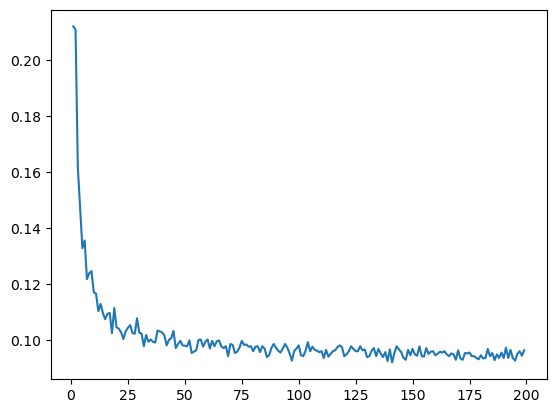

In [43]:
plt.plot(range(1,200),test_errs)
plt.show()

In [44]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [47]:
grid = {'rfc':{'randomforestclassifier__n_estimators':[150,175,200]},
        'log':{'logisticregression__C':[0.01,0.1,1,10,100],
               'logisticregression__solver':['liblinear','sag'],
               'logisticregression__penalty':['l1','l2','elasticnet']}}

In [48]:
#Now run the model and add it in to a dictionary
fit_model = {}
for algo,pipeline in pipelines.items():
    print(f"Currently training {algo} model")
    model = GridSearchCV(pipeline,grid[algo],cv=10)
    model.fit(X_train,y_train)
    fit_model[algo] = model

Currently training rfc model
Currently training log model


c:\Users\aadis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aadis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aadis\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\aadis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty

In [49]:
#Now display the accuracy of the prediction model
for algo,model in fit_model.items():
    preds = model.predict(X_test)
    acc_score = accuracy_score(y_test,preds)
    print(f"The accuracy score of the {algo} model is {acc_score}")

The accuracy score of the rfc model is 0.9044637122671805
The accuracy score of the log model is 0.8622350674373795


In [50]:
#Now save both of the models
import pickle
with open("RandomForestClassifier.pkl",'wb') as f:
    pickle.dump(fit_model['rfc'],f)

with open("RandomForestClassifier.pkl",'rb') as f:
    rfc_model = pickle.load(f)

In [51]:
with open("Logisticregression.pkl",'wb') as f:
    pickle.dump(fit_model['log'],f)

with open("Logisticregression.pkl",'rb') as f:
    log_model = pickle.load(f)

In [52]:
#Now testing with test.csv 
rfc_sub = rfc_model.predict(abt_test)
log_sub = log_model.predict(abt_test)

In [53]:
#Saving the results in the DataFrame
df_1 = pd.DataFrame({'id':test['id'],
                     'NObeyesdad':rfc_sub})
df_2 = pd.DataFrame({'id':test['id'],
                     'NObeyesdad':log_sub})

In [54]:
#Saving the submission in csv files
df_1.to_csv("Rfc.csv",index=False)
df_2.to_csv("log.csv",index=False)